## Customer Segmentation Using Kmeans clustering

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
df = pd.read_csv(r'/content/Mall_Customers.csv', index_col=0, header=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.shape

(200, 4)

In [4]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

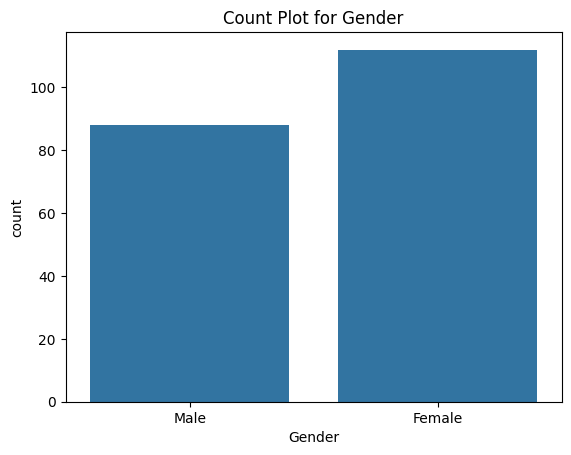

In [5]:
sns.countplot(x ='Gender', data = df)

plt.title("Count Plot for Gender")
plt.show()

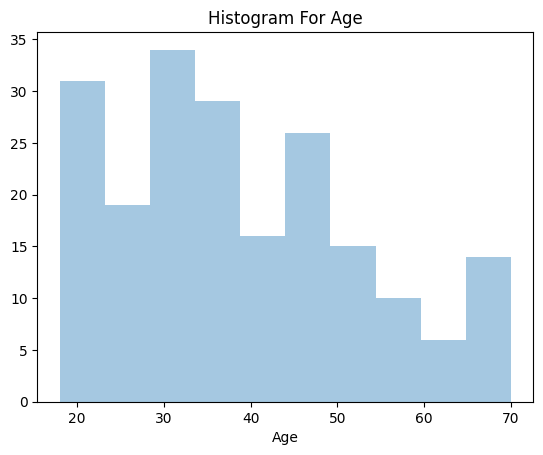

In [6]:
# Plot histogram
sns.distplot(df["Age"], bins=10, kde=False)
plt.title("Histogram For Age")
plt.show()

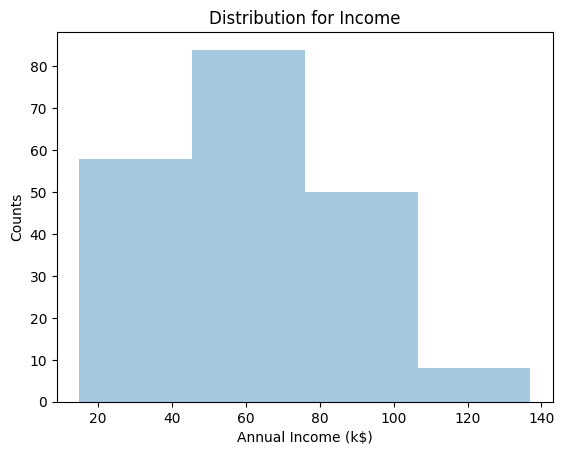

In [7]:
# Plot histogram
sns.distplot(df["Annual Income (k$)"], bins=4, kde=False)
plt.title("Distribution for Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Counts")
plt.show()

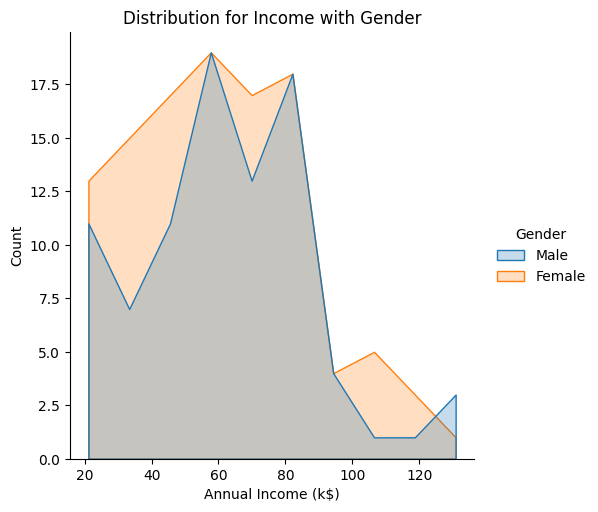

In [8]:
sns.displot(df, x="Annual Income (k$)", hue="Gender",element="poly")
plt.title("Distribution for Income with Gender")
plt.show()

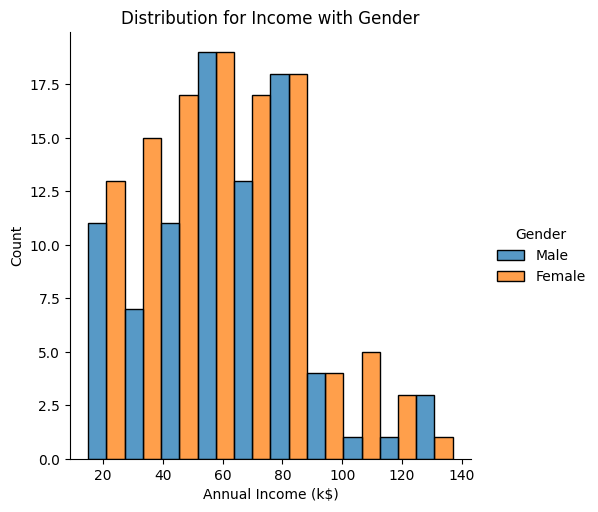

In [9]:
sns.displot(df, x="Annual Income (k$)", hue="Gender", multiple="dodge")
plt.title("Distribution for Income with Gender")
plt.show()

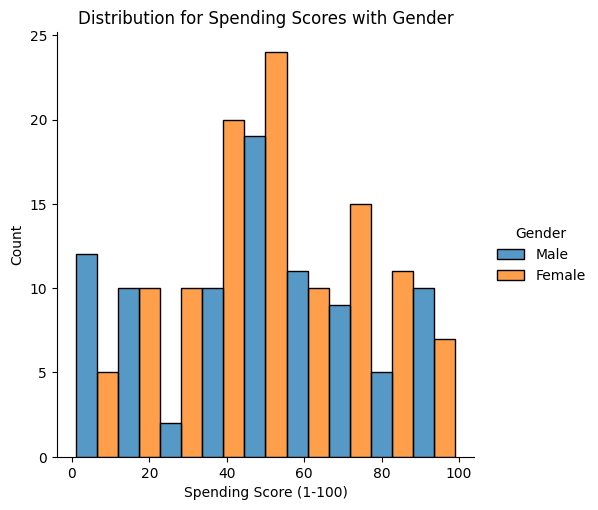

In [10]:
sns.displot(df, x="Spending Score (1-100)", hue="Gender", multiple="dodge")
plt.title("Distribution for Spending Scores with Gender")
plt.show()

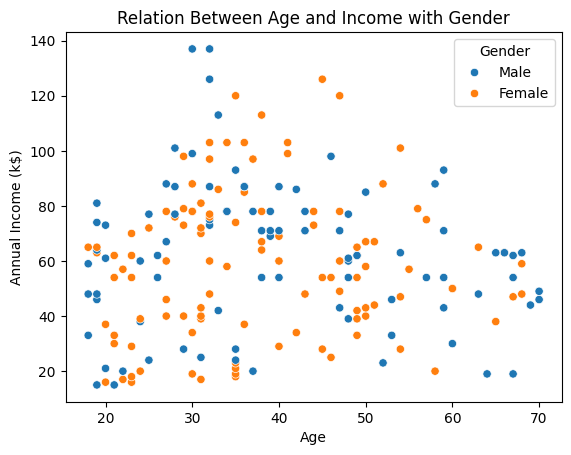

In [12]:
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Gender")
plt.title("Relation Between Age and Income with Gender")
plt.show()

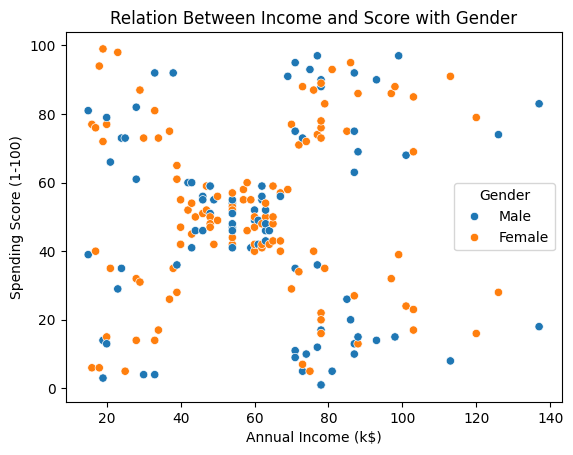

In [13]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")
plt.title("Relation Between Income and Score with Gender")
plt.show()

**Data Preprocessing**

In [14]:
print(df.shape)
print()
print(df.info())
print()
print(df.isnull().sum())

(200, 4)

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.9+ KB
None

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [15]:
df.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [16]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

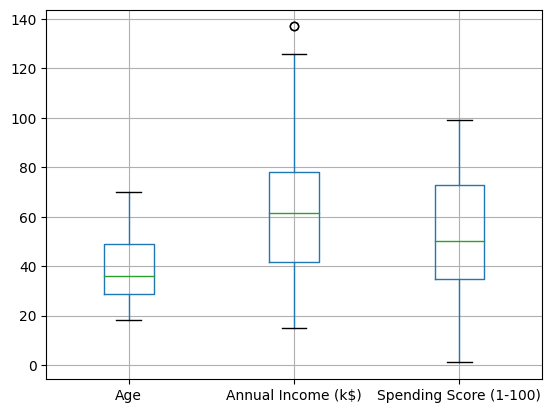

In [17]:
df.boxplot()
plt.show()

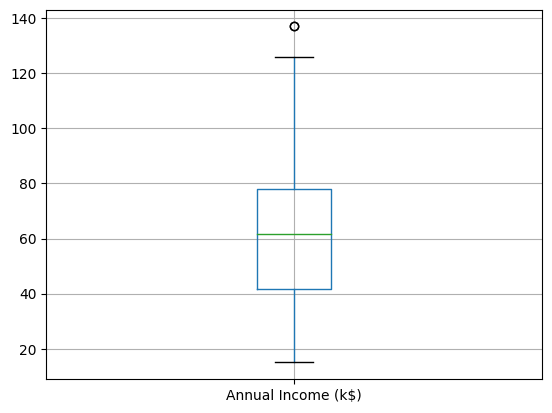

In [18]:
df.boxplot("Annual Income (k$)")
plt.show()

In [19]:
X = df.iloc[: , 2:4]

In [20]:
%%time
# Using the elbow method to find the optimal number of clusters
# Importing required libraries
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm  # For creating progress bars
# Setting the maximum number of clusters to consider
K_MAX = 15

# Initializing an empty list to store within-cluster sum of squares (WSSE)
wsse = []

# Creating a progress bar
with tqdm(total=K_MAX-1) as pbar:
    # Looping through each number of clusters from 1 to K_MAX-1
    for i in range(1, K_MAX):

        # Creating a KMeans clustering model with i clusters
        kmeans = KMeans(n_clusters=i, random_state=10)

        # Fitting the KMeans model to the data
        kmeans.fit(X)

        # Appending the WSSE (inertia) to the wsse list
        wsse.append(kmeans.inertia_)

        # Updating the progress bar
        pbar.update(1)


  0%|          | 0/14 [00:00<?, ?it/s]

CPU times: user 983 ms, sys: 56.1 ms, total: 1.04 s
Wall time: 841 ms


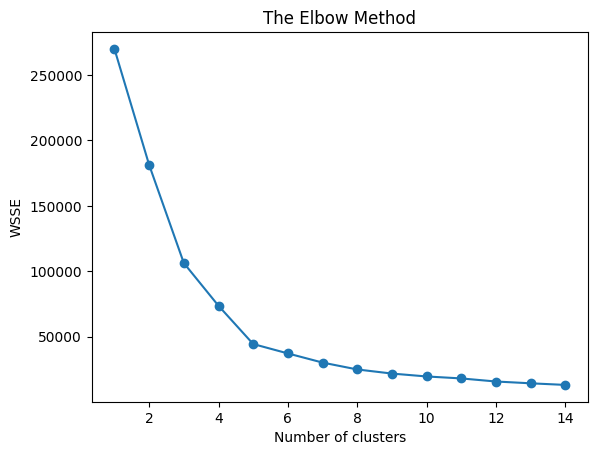

In [21]:
plt.plot(range(1, K_MAX), wsse)
plt.scatter(range(1, K_MAX),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [22]:
print(wsse[4])

44448.4554479337


In [23]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5,  random_state = 10)
kmeans.fit(X)
Y_pred = kmeans.predict(X)

In [24]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [25]:
kmeans.n_iter_

5

In [26]:
df["Clusters"]=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
6,Female,22,17,76,0
7,Female,35,18,6,3
8,Female,23,18,94,0
9,Male,64,19,3,3


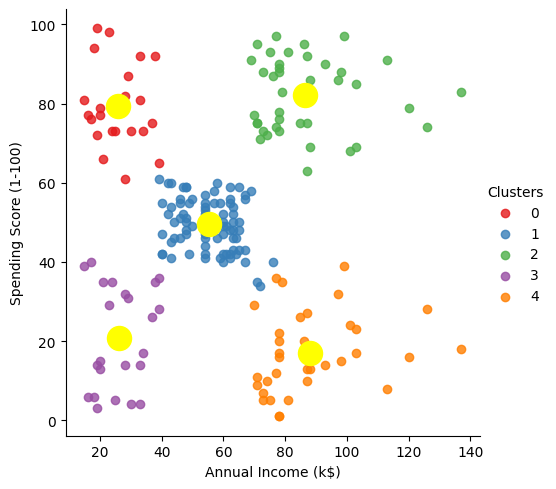

In [27]:
sns.lmplot(data=df,
           x='Annual Income (k$)',
           y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='Clusters',
           palette="Set1")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 300, c = 'yellow')
plt.show()

In [28]:
df["Clusters"]=df.Clusters.map({0:"Careless",1:"Sensible",2:"Target",
                              3:"NotUseful",4:"Careful"})

In [29]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,NotUseful
2,Male,21,15,81,Careless
3,Female,20,16,6,NotUseful
4,Female,23,16,77,Careless
5,Female,31,17,40,NotUseful


In [30]:
df.to_csv(r"Target-Cust.csv",index=True)